# Supervised classification problem

### Pipeline of ML model


1. import data (Data injection)
2. EDA
3. Preprocessing
4. Model -->> Mathematical Equation  (SVR/SVC)
5. Evaluation -->> Performance Matrics/Confusion Matirix

In [98]:
# importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings


%matplotlib inline
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from imblearn.combine import SMOTETomek
from imblearn.under_sampling import TomekLinks
from sklearn import metrics

In [30]:
# Storing the path of the data

wine_data = "https://raw.githubusercontent.com/aniruddhachoudhury/Red-Wine-Quality/master/winequality-red.csv"

### Loading the dataset

In [31]:
data = pd.read_csv(wine_data)

In [32]:
# top 5 records

data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [33]:
# Random 5 records

data.sample(5)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1510,6.4,0.36,0.21,2.2,0.047,26.0,48.0,0.99661,3.47,0.77,9.7,6
254,7.1,0.60,0.00,1.8,0.074,16.0,34.0,0.99720,3.47,0.70,9.9,6
823,6.7,0.54,0.13,2.0,0.076,15.0,36.0,0.99730,3.61,0.64,9.8,5
458,10.4,0.33,0.63,2.8,0.084,5.0,22.0,0.99980,3.26,0.74,11.2,7
202,6.8,0.50,0.11,1.5,0.075,16.0,49.0,0.99545,3.36,0.79,9.5,5


In [34]:
data.quality.unique()

array([5, 6, 7, 4, 8, 3])

In [35]:
data['quality'].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

Observation :
- As output type is of more than two types for Logistic Regression -->> Multinomial 

In [36]:
# Columns of the dataset

data.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [37]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


Observation :
- There is no null value
- All the input features are of 'Float' type and output label is of 'int' type

In [38]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1599.0,8.319637,1.741096,4.60000,7.1000,7.90000,9.200000,15.90000
volatile acidity,1599.0,0.527821,0.179060,0.12000,0.3900,0.52000,0.640000,1.58000
citric acid,1599.0,0.270976,0.194801,0.00000,0.0900,0.26000,0.420000,1.00000
residual sugar,1599.0,2.538806,1.409928,0.90000,1.9000,2.20000,2.600000,15.50000
chlorides,1599.0,0.087467,0.047065,0.01200,0.0700,0.07900,0.090000,0.61100
free sulfur dioxide,1599.0,15.874922,10.460157,1.00000,7.0000,14.00000,21.000000,72.00000
total sulfur dioxide,1599.0,46.467792,32.895324,6.00000,22.0000,38.00000,62.000000,289.00000
density,1599.0,0.996747,0.001887,0.99007,0.9956,0.99675,0.997835,1.00369
pH,1599.0,3.311113,0.154386,2.74000,3.2100,3.31000,3.400000,4.01000
sulphates,1599.0,0.658149,0.169507,0.33000,0.5500,0.62000,0.730000,2.00000


Observation :
- 'total sulfur dioxide' column has outliers
- 'free sulfur dioxide' column has outliers
- 'residual sugar' column has outliers

This shows features are not in same scale, we need to standardize them

#### Categorizing numerical and categorical features

In [39]:
data_num = [feature for feature in data.columns if data[feature].dtypes!='O']
data_cat = [feature for feature in data.columns if data[feature].dtypes=='O']
print(f'We have {len(data_num)} numerical features')
print(f'We have {len(data_cat)} categorical features')

We have 12 numerical features
We have 0 categorical features


### EDA

Univariate analysis

#### To check the distribution of every feature

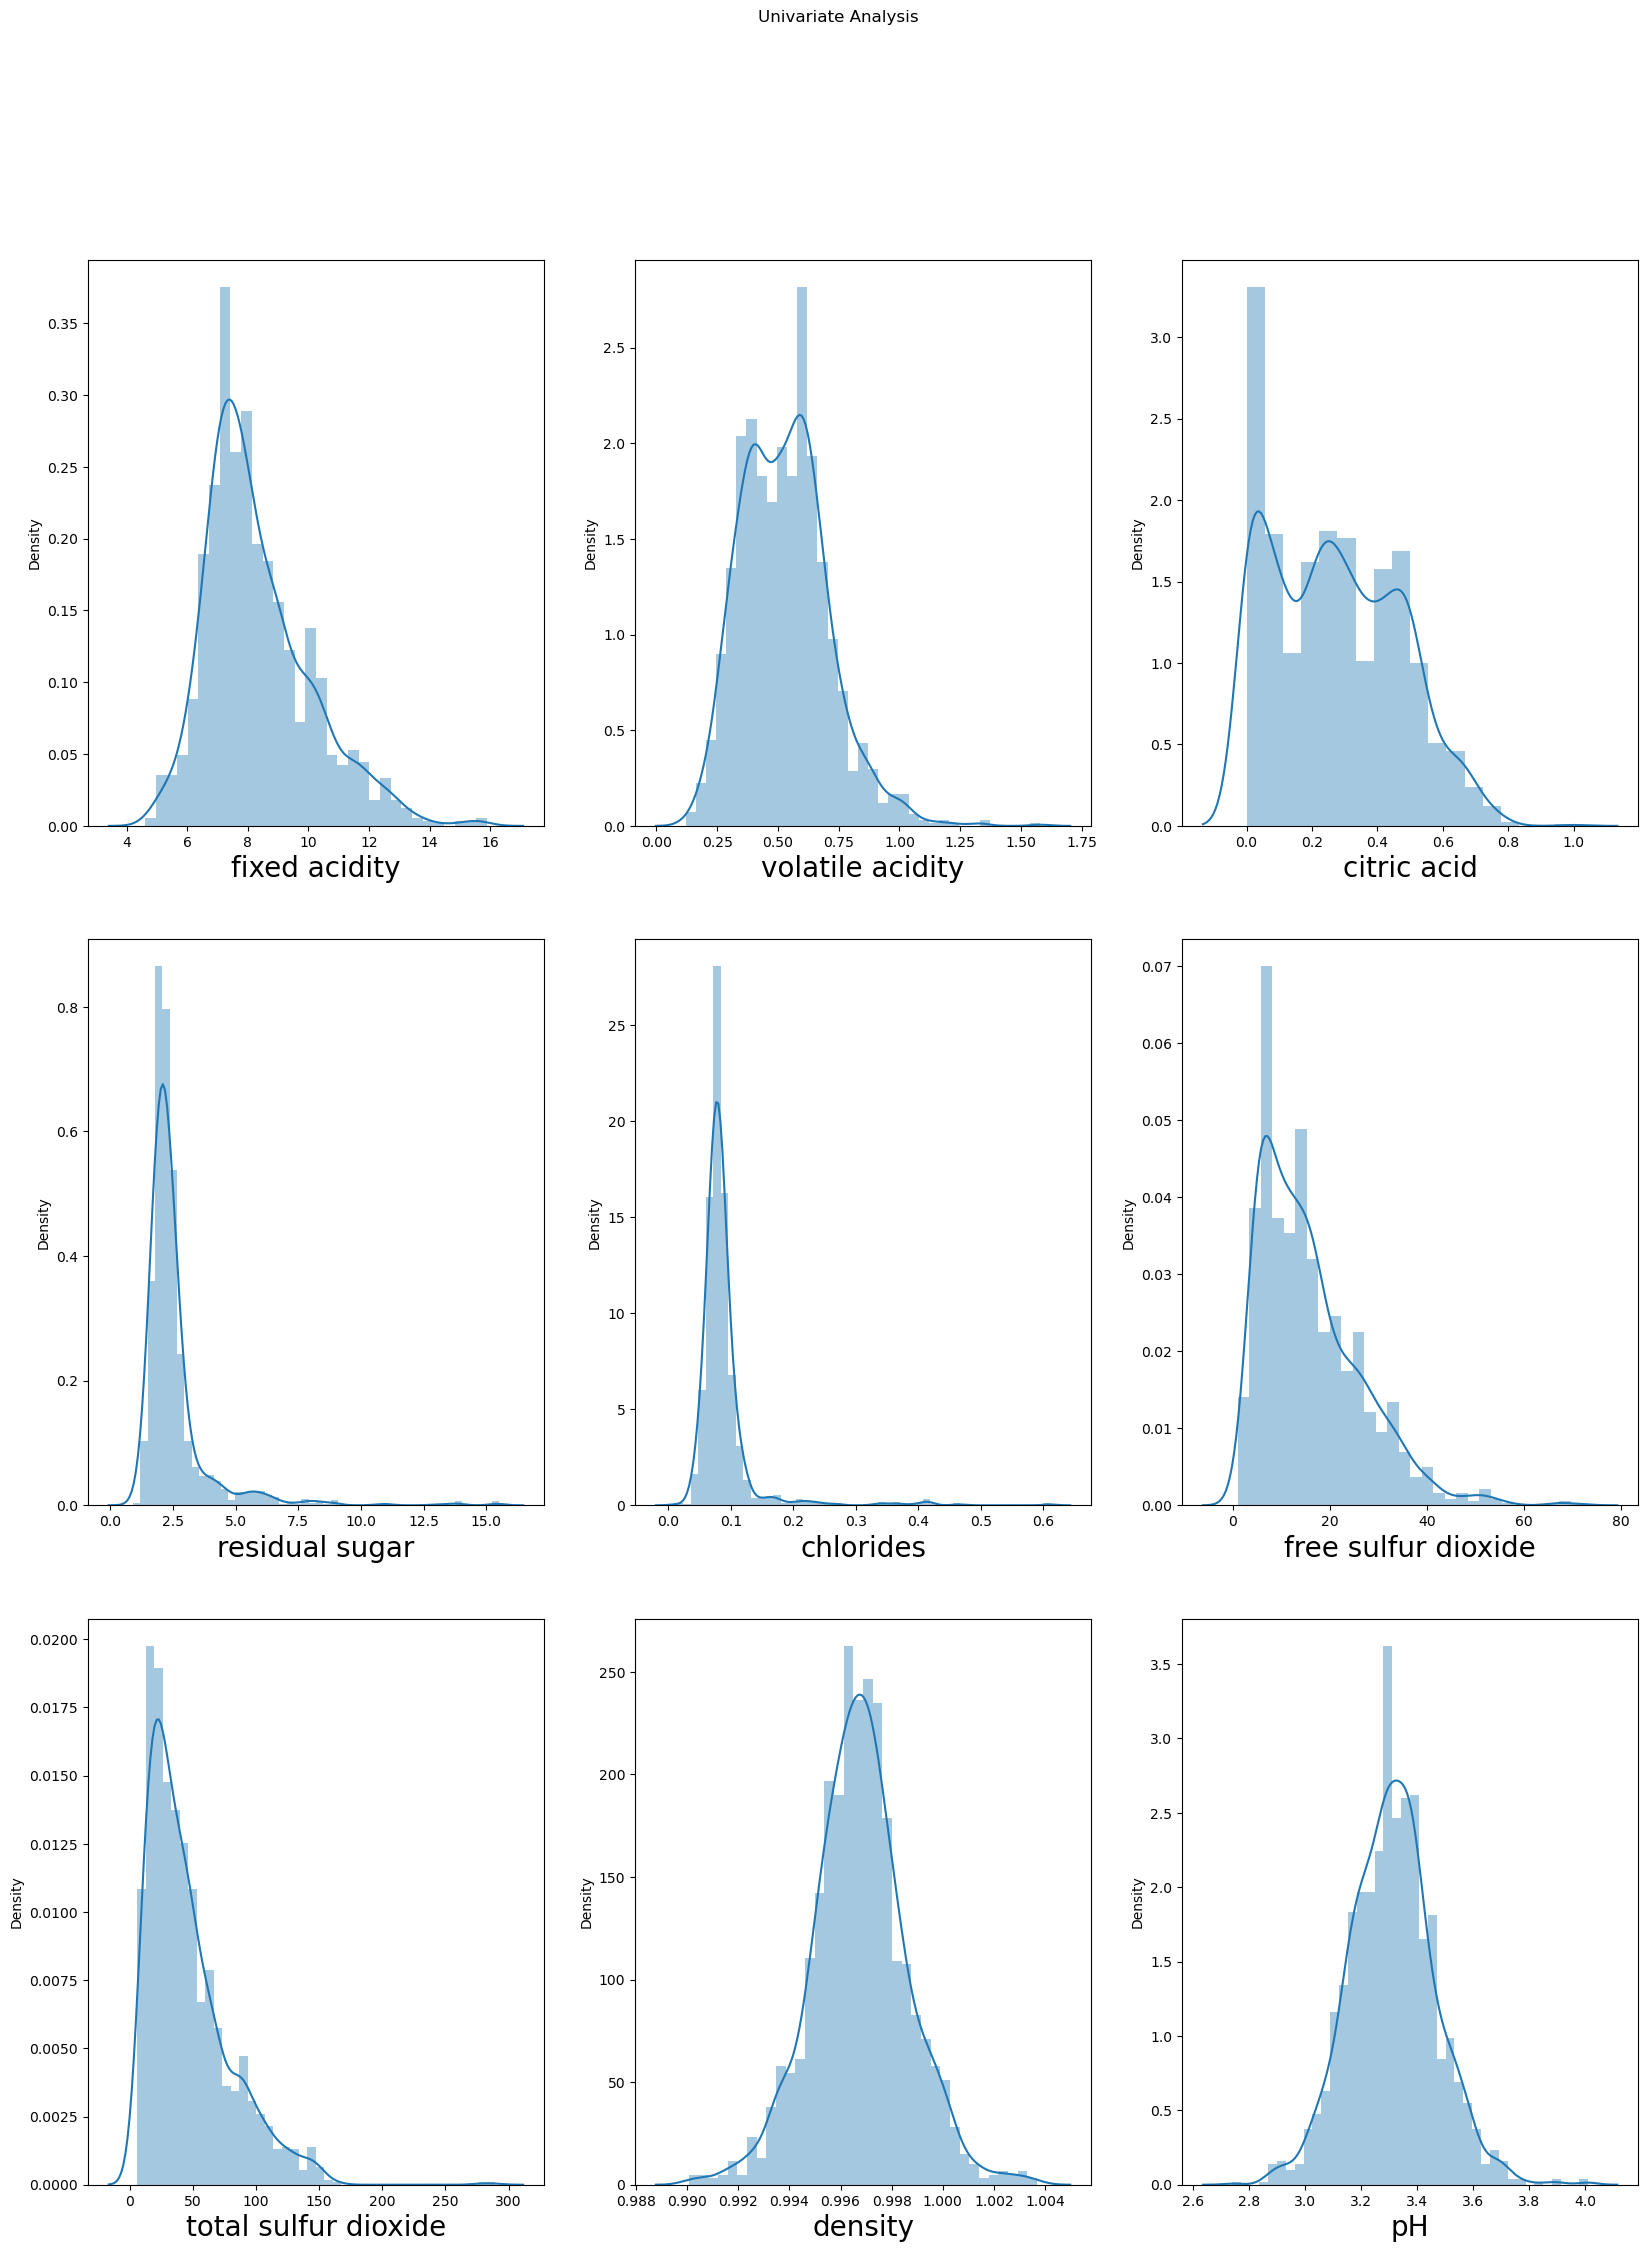

In [40]:
plt.figure(figsize=(20,25), facecolor='white')
plt.suptitle('Univariate Analysis')

plotnumber = 1
for columns in data:
    if plotnumber<=9 :
        ax = plt.subplot(3,3,plotnumber)
        sns.distplot(data[columns])
        plt.xlabel(columns, fontsize=20)
    plotnumber+=1
plt.show()

### To check the correlation

In [45]:
data.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot: xlabel='quality', ylabel='count'>

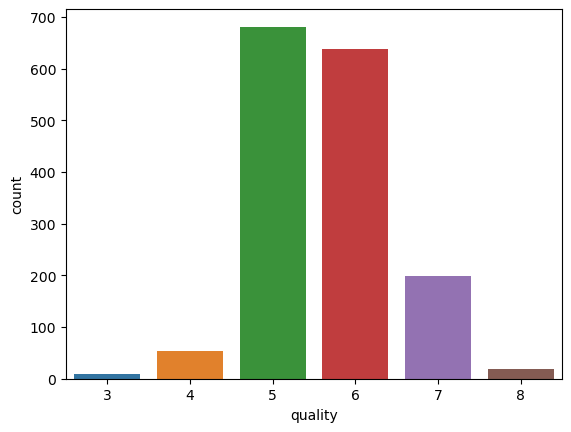

In [46]:
sns.countplot(x=data['quality'])

Observation :
- There is a highly imbalanced data.

### heatmap

<AxesSubplot: >

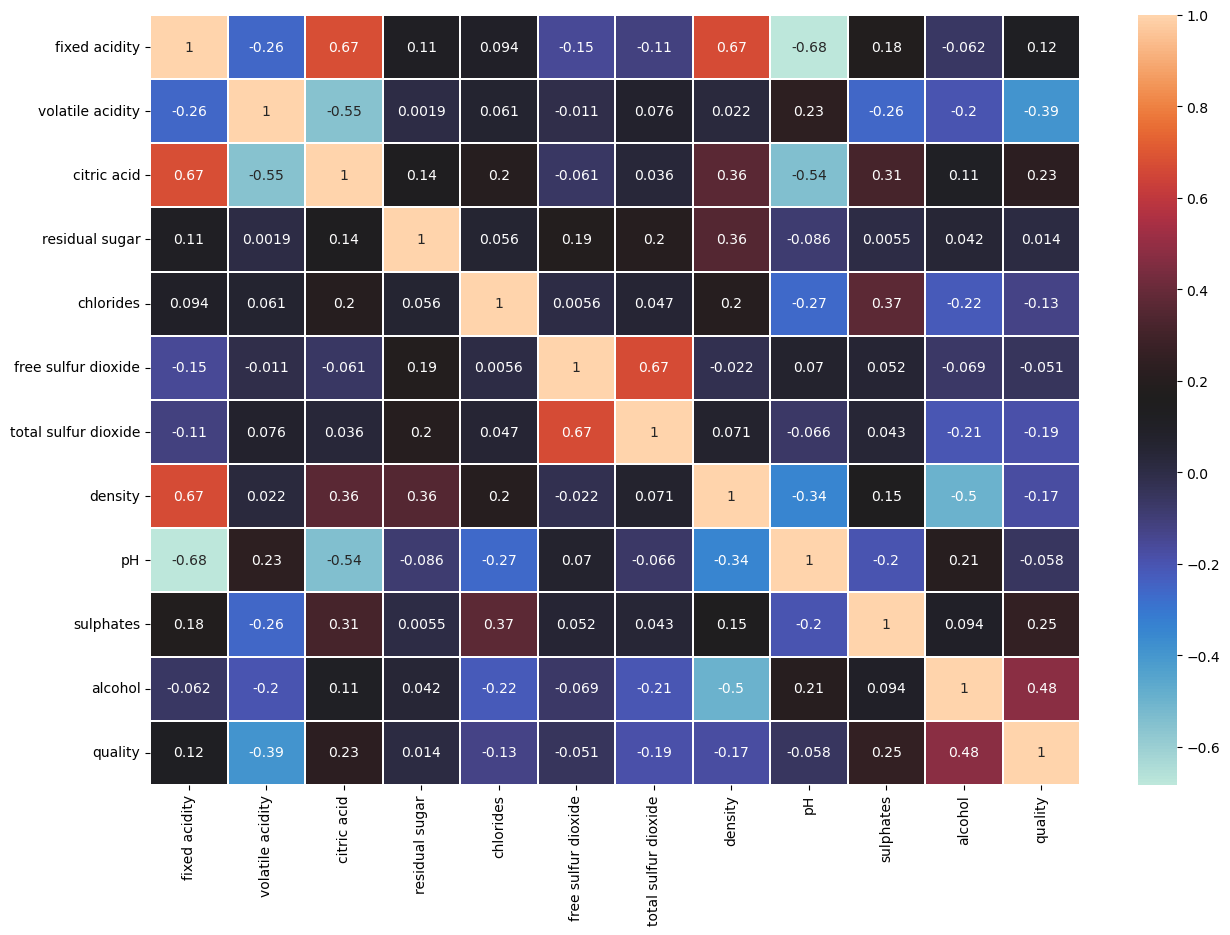

In [44]:
plt.figure(figsize=(15,10))
sns.heatmap(data.corr(), annot=True, cmap='icefire', linewidths=0.2)

Observation :
- Red=sidual Sugar, Chlorides, Total sulfer dioxide, free sulfer dioxide are right skewed.
- Density, Ph,  are approx normally distributed

In [47]:
# Considering the input features 

X = data.drop('quality', axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2


In [48]:
# Output label

y = data['quality']

### Train test split

In [49]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [50]:
X_test.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
803,7.7,0.56,0.08,2.50,0.114,14.0,46.0,0.9971,3.24,0.66,9.6
124,7.8,0.50,0.17,1.60,0.082,21.0,102.0,0.9960,3.39,0.48,9.5
350,10.7,0.67,0.22,2.70,0.107,17.0,34.0,1.0004,3.28,0.98,9.9
682,8.5,0.46,0.31,2.25,0.078,32.0,58.0,0.9980,3.33,0.54,9.8
1326,6.7,0.46,0.24,1.70,0.077,18.0,34.0,0.9948,3.39,0.60,10.6


#### Checking the shape

In [55]:
X_train.shape  ,  X_test.shape

((1071, 11), (528, 11))

In [56]:
y_train.shape, y_test.shape

((1071,), (528,))

In [64]:
## Scaling down the features

scaler = StandardScaler()

In [65]:
scaler.fit(X_train)   # calculate Mean and std

StandardScaler()

In [66]:
print(scaler.mean_)

[ 8.30345472  0.53246499  0.26933707  2.54691877  0.08772736 15.91223156
 46.76330532  0.99677933  3.31453782  0.65881419 10.41521942]


In [67]:
X_train_tf = scaler.transform(X_train)
X_train_tf

array([[ 2.40069523, -1.03103722,  1.12742595, ..., -1.26096312,
         0.52726134, -0.01431863],
       [-0.93967131,  1.22920403, -1.32502245, ...,  1.52622836,
        -0.28225704,  2.24363201],
       [-0.99827424,  0.55113165, -1.37611513, ..., -0.74241587,
        -1.20742091, -0.86105011],
       ...,
       [-0.6466567 ,  0.49462562, -1.06955908, ...,  1.26695473,
        -0.68701624, -0.86105011],
       [-0.23643625, -1.87862768,  0.4121285 , ...,  0.03540501,
         0.81637505,  1.39690052],
       [-1.46709761, -1.3700734 , -0.04770558, ...,  0.48913386,
        -0.68701624,  2.90220094]])

### SVC

In [68]:
model = SVC()

In [69]:
model.fit(X_train_tf, y_train)

SVC()

In [70]:
model.score(X_train_tf, y_train)

0.6778711484593838

Observation :
- Training accuracy is 67%

In [71]:
## scaling the test data

X_test_tf = scaler.transform(X_test)

In [72]:
y_predict = model.predict(X_test_tf)

In [73]:
y_test

803     6
124     5
350     6
682     5
1326    6
       ..
813     4
377     7
898     7
126     5
819     5
Name: quality, Length: 528, dtype: int64

#### Accuracy of SVC model

In [76]:
accuracy_score(y_test, y_predict)

0.5984848484848485

Observation :
- Test accuracy of SVC model is around 60%

#### To improve the accuracy we can check with Logistic Regression model

In [79]:
model2 = LogisticRegression()

In [80]:
model2.fit(X_train_tf, y_train)

LogisticRegression()

In [81]:
model.score(X_train_tf, y_train)

0.6778711484593838

In [82]:
y_predict2 = model2.predict(X_test_tf)

#### Accuracy of the Logistic Regression model

In [83]:
accuracy_score(y_test, y_predict2)

0.571969696969697

Observation :
- Accuracy of Logistic regression model is 57%   

Single value prediction

In [84]:
X_test_tf[0]

array([-0.3536421 ,  0.15558944, -0.96737373, -0.03334372,  0.55556956,
       -0.18596079, -0.02314512,  0.1740298 , -0.48314224,  0.00685666,
       -0.76696884])

In [85]:
model2.predict([[-0.3536421 ,  0.15558944, -0.96737373, -0.03334372,  0.55556956,
       -0.18596079, -0.02314512,  0.1740298 , -0.48314224,  0.00685666,
       -0.76696884]])

array([5])

## GridSearchCV 
#### What is GridSearchCV 
A Machine Learning model is defined as a mathematical model with a
number of parameters that need to be learned from the data. However,
there are some parameters, known as Hyperparameters and those cannot
be directly learned. They are commonly chosen by humans based on some
intuition or hit and trial before the actual training begins. These
parameters exhibit their importance by improving the performance of the
model such as its complexity or its learning rate. Models can have many
hyper-parameters and finding the best combination of parameters can be
treated as a search problem.

SVM also has some hyper-parameters (like what C or gamma values to
use) and finding optimal hyper-parameter is a very hard task to solve. But
it can be found by just trying all combinations and see what parameters
work best. The main idea behind it is to create a grid of hyper-parameters
and just try all of their combinations.

GridSearchCV takes a dictionary that describes the parameters that could
be tried on a model to train it. The grid of parameters is defined as a
dictionary, where the keys are the parameters and the values are the
settings to be tested.

In [86]:
### Definning the params

param_grid = {'C':[0.1,1,10,100],
             'gamma' : [1, 0.1, 0.01, 0.001],
             'kernel' : ['linear', 'rbf']}

In [88]:
# GridSearchCV(estimator, paramgrid, other parameters)

model3 = GridSearchCV(SVC(), param_grid, refit=True, verbose=3)

In [89]:
model3.fit(X_train_tf, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.549 total time=   0.0s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.561 total time=   0.0s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.561 total time=   0.0s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.593 total time=   0.0s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.659 total time=   0.0s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.433 total time=   0.1s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.1s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.1s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.435 total time=   0.1s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.430 total time=   0.1s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.549 total time=   0.0s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [93]:
# accuracy of model after training

model3.score(X_train_tf, y_train)

0.9990662931839402

Observation :
- GridSearchCV model's training accuracy is 99%

In [91]:
# Best parameters after tuning

print(model3.best_params_)

{'C': 10, 'gamma': 1, 'kernel': 'rbf'}

In [92]:
# how our model looks after hyper parameter tuning

print(model3.best_estimator_)

SVC(C=10, gamma=1)


In [94]:
# predicting y value

y_predict3 = model3.predict(X_test_tf)

In [95]:
# calculating the accuracy of the model

accuracy_score(y_test, y_predict3)

0.6287878787878788

Observation :
- Accuracy of the GridSearchCV model is around 63%
- Which shows a over fitted model as the test accuracy is much lower than train accuracy

### Now lets try to do some sampling inorder to handle our imbalance data and apply grid search cv over it. We are going to perform SMOTE-Tomek Links sampling here

(ref :- https://towardsdatascience.com/imbalanced-classification-in-python-smote-tomek-links-method-6e48dfe69bbc )



In [101]:
# Performing sampling

resample = SMOTETomek(tomek=TomekLinks(sampling_strategy='majority'))
sampled_x, sampled_y = resample.fit_resample(X, y)

In [102]:
# Checking the shape of the sample

print(sampled_x.shape)
print(sampled_y.shape)

(4083, 11)
(4083,)


In [103]:
# Since our dataset shape has changed we need to perform train_test_split again

X_train_sm, X_test_sm, y_train_sm, y_test_sm = train_test_split(sampled_x, sampled_y, test_size=0.33, random_state=44)

In [104]:
## Applying standardization to our model

scaler.fit(X_train)
X_train_tf_sm = scaler.transform(X_train_sm)
X_test_tf_sm = scaler.transform(X_test_sm)

In [106]:
# Applying GridSearch with SVC on top of sample data

model3.fit(X_train_tf_sm, y_train_sm)

Fitting 5 folds for each of 32 candidates, totalling 160 fits
[CV 1/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.618 total time=   0.2s
[CV 2/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.589 total time=   0.2s
[CV 3/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.583 total time=   0.2s
[CV 4/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.603 total time=   0.2s
[CV 5/5] END .....C=0.1, gamma=1, kernel=linear;, score=0.581 total time=   0.2s
[CV 1/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.5s
[CV 2/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.523 total time=   0.5s
[CV 3/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.497 total time=   0.5s
[CV 4/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.525 total time=   0.5s
[CV 5/5] END ........C=0.1, gamma=1, kernel=rbf;, score=0.501 total time=   0.5s
[CV 1/5] END ...C=0.1, gamma=0.1, kernel=linear;, score=0.618 total time=   0.2s
[CV 2/5] END ...C=0.1, gamma=0.1, kernel=linear

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100], 'gamma': [1, 0.1, 0.01, 0.001],
                         'kernel': ['linear', 'rbf']},
             verbose=3)

In [107]:
## Training accuracy score

model3.score(X_train_tf_sm, y_train_sm)

1.0

In [108]:
# Test accuracy after prediction

y_predict_grid_sm = model3.predict(X_test_tf_sm)
accuracy_score(y_test_sm, y_predict_grid_sm)

0.8531157270029673

Observation :
- The accuracy is increased to 85% using Sampling and GridSearchCV with SVC

use full resources - https://www.geeksforgeeks.org/svm-hyperparametertuning-using-gridsearchcv-ml/

sampling - https://towardsdatascience.com/imbalanced-classification-inpython-smote-tomek-links-method-6e48dfe69bbc

sampling implementation reference - https://www.aitude.com/multiclassclassification-on-highly-imbalanced-dataset/